In [1]:
import video.vid as v
import video.videolike as vl
import pandas as pd
from video import df
import numpy as np
from importlib import reload
from cv2 import inRange
import matplotlib.pyplot as plt
from video.conversion import Conversions


In [2]:
reload(v)
path = 'videos/Red Spin.mp4'
vid = v.Video.from_file(path)
vid_df = df.get_vid_df(path)


## Testing that outputs are the same as `df`

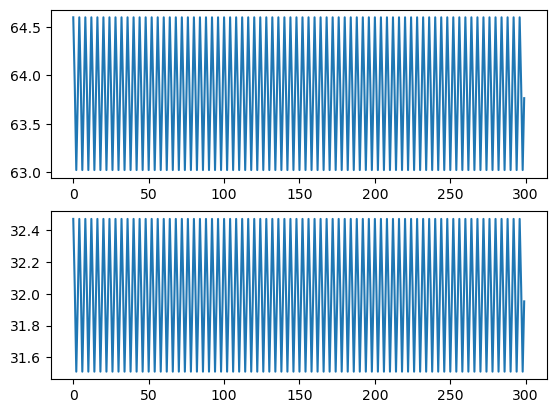

In [3]:
reload(v)
fig, axs = plt.subplots(2, 1)
axs[0].plot(vid.value.agg('mean'))
axs[1].plot(vid_df.groupby(level=0).lightness.mean())
plt.show()


TypeError: VideoLike.pct_change() missing 1 required positional argument: 'agg'

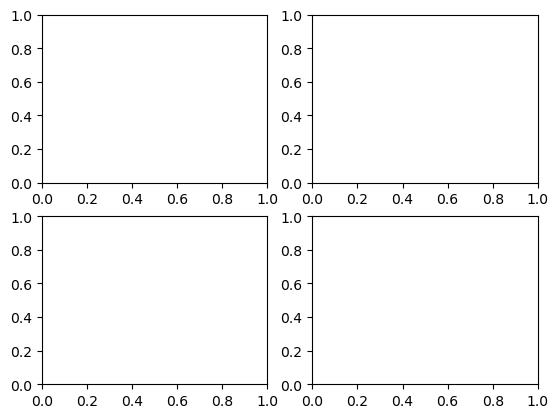

In [4]:
reload(v)

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(vid.pct_change('value', 1))
axs[0][1].plot(vid.value.pct_change(1))
axs[1, 0].plot(vid.hue.agg('sum'))


<Axes: xlabel='frame'>

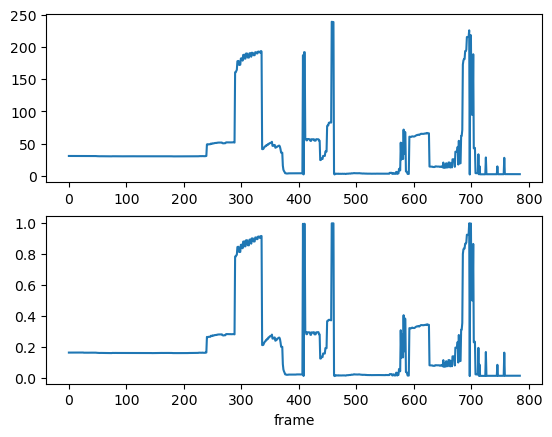

In [ ]:
reload(vl)
reload(v)
from video.reader import VideoReader
fig, axs = plt.subplots(2, 1)
new_vid,fps = VideoReader.get_vid('videos/Banned Pokemon Seizure Scene.mp4', Conversions.HLS.value.load)
vid_df = df.get_exploration_df(new_vid,fps)
new_vid = v.Video(new_vid, fps, Conversions.HLS)
masked_vid = new_vid.mask('lightness', 160, 255)
axs[0].plot(masked_vid.lightness.agg('mean'))

vid_df.groupby(level=0).masked_values.mean().plot(ax=axs[1])

In [ ]:
vid_df.head()

hue  lightness  saturation  masked_values  seconds
frame y x                                                    
0     0 0    0         36           0              0        0
        1    0         34           0              0        0
        2    0         33           0              0        0
        3    0         32           0              0        0
        4    0         31           0              0        0

In [ ]:
df_mean = vid_df.groupby(level=0).lightness.mean()
vid_mean = new_vid.lightness.agg('mean')
df_mean = pd.DataFrame(df_mean)
df_mean['v_lightness'] = vid_mean
df_mean.apply(lambda row: row.lightness != row.v_lightness, axis=1).sum()


0

In [ ]:
df_sum = vid_df.groupby(level=0).lightness.sum()
vid_sum = new_vid.lightness.agg('sum')
df_sum = pd.DataFrame(df_sum)
df_sum['v_lightness'] = vid_sum
df_sum.apply(lambda row: row.lightness != row.v_lightness, axis=1).sum()


0

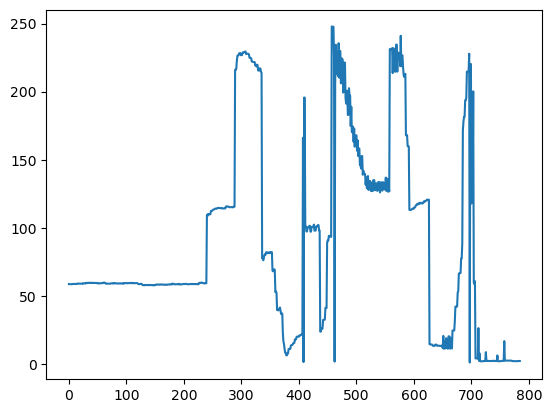

In [ ]:
reload(v)
reload(vl)
vid = v.Video.from_file(
    'videos/Banned Pokemon Seizure Scene.mp4', Conversions.HSV)
plt.plot(vid.mask('value', 190,255).value.agg('mean'))
plt.show()